# Import Library

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score, 
                             precision_score,roc_auc_score, 
                             confusion_matrix, classification_report, 
                             ConfusionMatrixDisplay)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipeline
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 74)
sns.set_context('notebook')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

# Data Description

In [265]:
description = pd.read_excel('LCDataDictionary.xlsx', sheet_name='Sheet3')

In [266]:
description

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,member_id,A unique LC assigned Id for the borrower member.,id unik LC untuk setiap anggota peminjam
1,loan_amn,Last month payment was received,pembayaran yang diterima bulan lalu
2,funded_amnt,The total amount committed to that loan at tha...,komitment total pembayaran setiap bulannya
3,funded_amnt_inv,?,NaN
4,term,The number of payments on the loan. Values are...,berapa bulan ia meminjam
5,int_rate,"Indicates if income was verified by LC, not ve...",tingkat rating verified LC
6,installment,The monthly payment owed by the borrower if th...,NaN
7,grade,NaN,NaN
8,sub_grade,NaN,NaN
9,emp_title,pekerjaan member,NaN


# Load Data

In [267]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [268]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check Data

In [269]:
# Delete column Unnamed
df.drop('Unnamed: 0', inplace=True, axis=1)

In [270]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [272]:
# Check duplicate data
df.duplicated().sum()

0

In [273]:
# Check Unique Value of the data
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()

id int64
54734 38098114

member_id int64
70473 40860827

loan_amnt int64
500 35000

funded_amnt int64
500 35000

funded_amnt_inv float64
0.0 35000.0

term object
[' 36 months' ' 60 months']

int_rate float64
5.42 26.06

installment float64
15.67 1409.99

grade object
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade object
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title object
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length object
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership object
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

annual_inc float64
1896.0 7500000.0

verification_status object
['Verified' 'Source Verified' 'Not Verified']

issue_d object
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11'

In [274]:
# Check Null Value
null_counts = df.isnull().sum()
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100

null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
null_df = null_df.sort_values(by='Null Percentage', ascending=False)

null_df.reset_index(inplace=True)
null_df.rename(columns={'index': 'Feature'}, inplace=True)

null_df[['Feature', 'Null Count', 'Null Percentage']]

,Feature,Null Count,Null Percentage
0,inq_last_12m,466285,100.000000
1,verification_status_joint,466285,100.000000
2,open_acc_6m,466285,100.000000
3,open_il_6m,466285,100.000000
4,open_il_12m,466285,100.000000
5,open_il_24m,466285,100.000000
6,mths_since_rcnt_il,466285,100.000000
7,dti_joint,466285,100.000000
8,total_bal_il,466285,100.000000
9,annual_inc_joint,466285,100.000000


In [275]:
# Drop feature column with null value above 25%
drop_feature = null_percentage[null_percentage > 25].index.tolist() + ['member_id', 'id', 'url', 'desc']
df.drop(columns=drop_feature, inplace=True)

In [276]:
# Creates a variable that has null values
feature_null = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_title', 'emp_length','last_pymnt_d', 
                'revol_util', 'collections_12_mths_ex_med', 'last_credit_pull_d', 'open_acc', 'pub_rec', 
                'total_acc', 'inq_last_6mths', 'earliest_cr_line', 'delinq_2yrs', 'acc_now_delinq', 'title', 'annual_inc']
df[feature_null]

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_title,emp_length,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,open_acc,pub_rec,total_acc,inq_last_6mths,earliest_cr_line,delinq_2yrs,acc_now_delinq,title,annual_inc
0,NaN,NaN,NaN,NaN,10+ years,Jan-15,83.7,0.0,Jan-16,3.0,0.0,9.0,1.0,Jan-85,0.0,0.0,Computer,24000.0
1,NaN,NaN,NaN,Ryder,< 1 year,Apr-13,9.4,0.0,Sep-13,3.0,0.0,4.0,5.0,Apr-99,0.0,0.0,bike,30000.0
2,NaN,NaN,NaN,NaN,10+ years,Jun-14,98.5,0.0,Jan-16,2.0,0.0,10.0,2.0,Nov-01,0.0,0.0,real estate business,12252.0
3,NaN,NaN,NaN,AIR RESOURCES BOARD,10+ years,Jan-15,21.0,0.0,Jan-15,10.0,0.0,37.0,1.0,Feb-96,0.0,0.0,personel,49200.0
4,NaN,NaN,NaN,University Medical Group,1 year,Jan-16,53.9,0.0,Jan-16,15.0,0.0,38.0,0.0,Jan-96,0.0,0.0,Personal,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,294998.0,29900.0,Financial Advisor,4 years,Jan-16,77.6,0.0,Jan-16,18.0,0.0,36.0,2.0,Apr-03,0.0,0.0,Debt consolidation,110000.0
466281,0.0,221830.0,39400.0,Chief of Interpretation (Park Ranger),10+ years,Dec-14,46.3,0.0,Jan-16,18.0,1.0,30.0,5.0,Jun-97,0.0,0.0,Debt consolidation,78000.0
466282,0.0,73598.0,13100.0,patrol,7 years,Jan-16,51.1,0.0,Dec-15,18.0,0.0,43.0,2.0,Dec-01,0.0,0.0,Debt consolidation,46000.0
466283,0.0,591610.0,53100.0,Server Engineer Lead,3 years,Dec-14,21.5,0.0,Apr-15,21.0,0.0,27.0,1.0,Feb-03,3.0,0.0,Credit card refinancing,83000.0


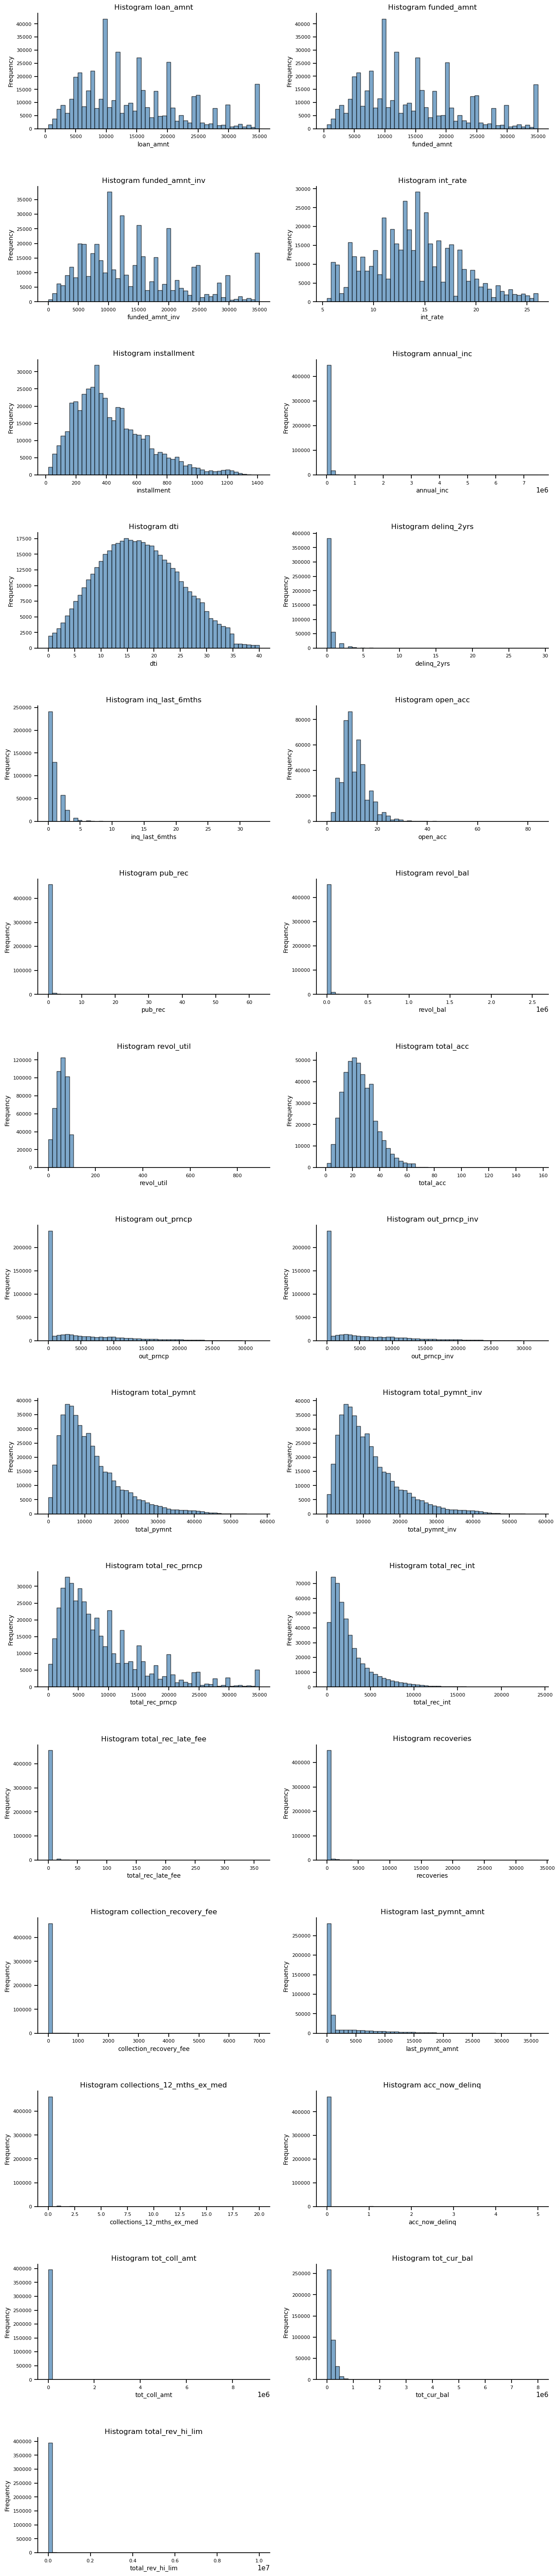

In [277]:
# Check Data Distribution
df_plot = df.select_dtypes(include=['float', 'int'])
df_plot.drop(columns=['policy_code'], inplace=True)

numeric = df_plot.columns

edgecolor = 'black'
alpha = 0.7

titles = ["Histogram " + col for col in numeric]

nrows = (len(numeric) + 1) // 2

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    n, bins, patches = ax.hist(df[col], bins=50, color='steelblue', alpha=alpha, edgecolor=edgecolor)
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for i in range(len(numeric), nrows * 2):
    fig.delaxes(axes.flatten()[i])
    
plt.show()

# EDA (Exploratory Data Analysis)

## Loan Status Analysis

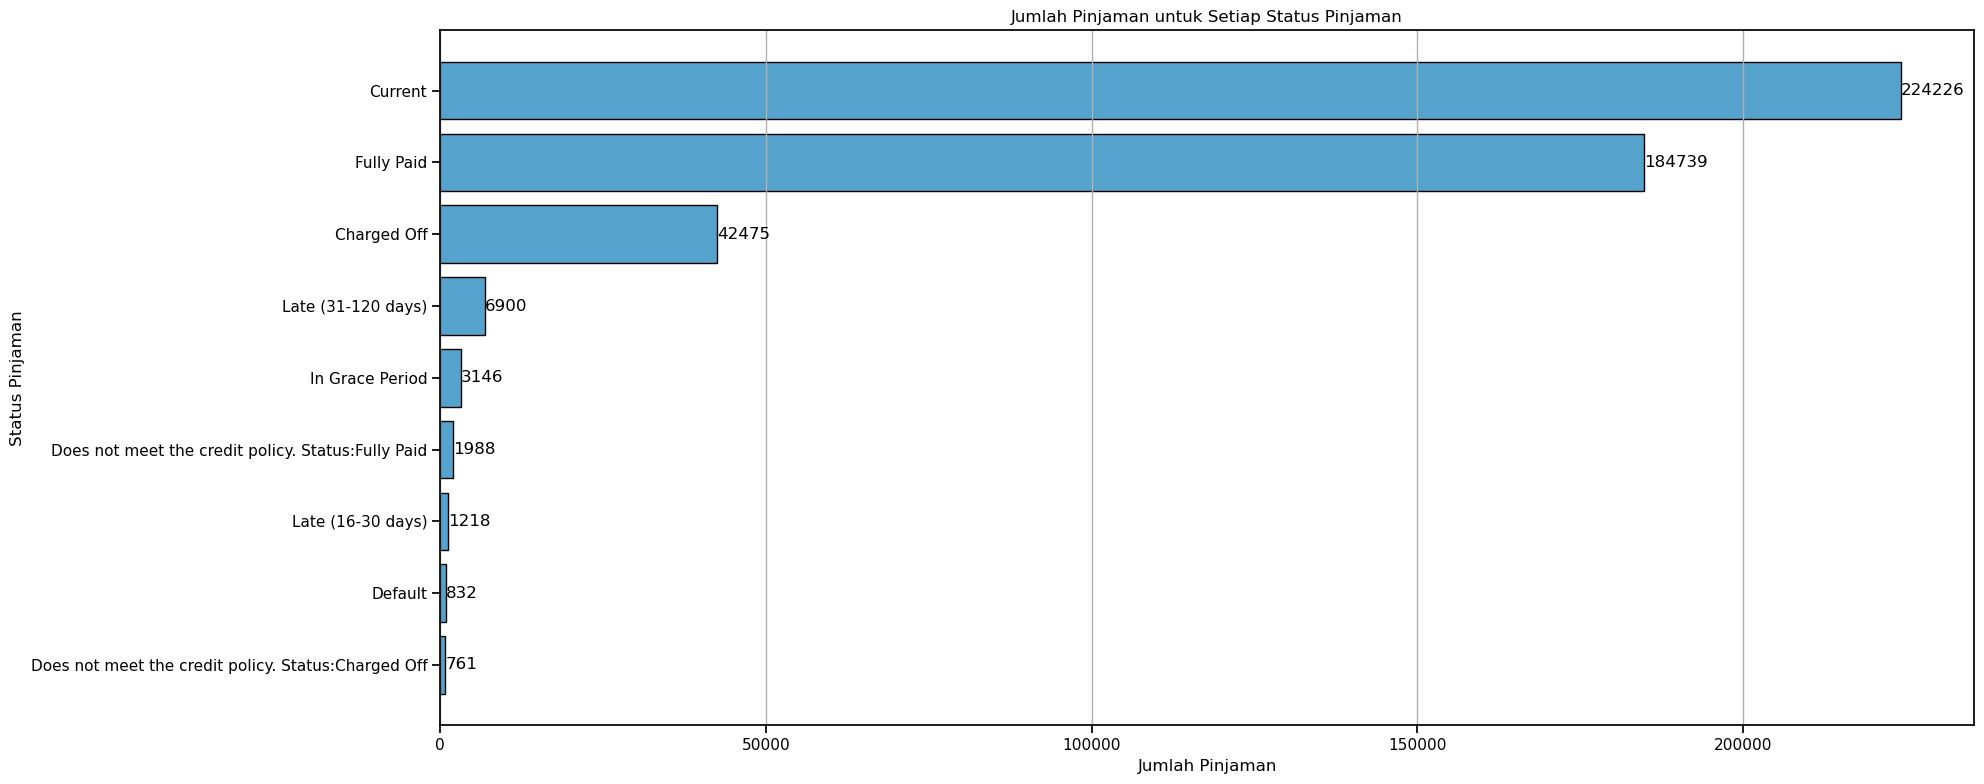

Presentase masing-masing value dari loan_status:
loan_status
Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: count, dtype: object


In [278]:
loan_counts_by_status = df['loan_status'].value_counts()
loan_counts_by_status_sorted = loan_counts_by_status.sort_values(ascending=False)

plt.figure(figsize=(20, 8))
bars = plt.barh(loan_counts_by_status_sorted.index, loan_counts_by_status_sorted.values, edgecolor='black')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center')

plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Status Pinjaman')
plt.title('Jumlah Pinjaman untuk Setiap Status Pinjaman')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

total_loans = loan_counts_by_status_sorted.sum()
percentages = (loan_counts_by_status_sorted / total_loans) * 100
print("Presentase masing-masing value dari loan_status:")
print(percentages.apply(lambda x: f"{x:.2f}%"))

In [279]:
good = ['Fully Paid']
bad = ['Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 
       'Default', 'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)']

def label_loan_status(values):
    if values in good:
        return 1
    return 0

modify_df = df[df["loan_status"].isin(good + bad)].copy()
modify_df["loan_status"] = modify_df["loan_status"].apply(label_loan_status)

In [280]:
status_percentage = 100*modify_df['loan_status'].value_counts()/len(modify_df['loan_status'])
status_percentage = pd.DataFrame(status_percentage)
status_percentage.rename(columns={"loan_status": "Status Percentage"}, inplace =True)
status_percentage.insert(0, "Status", ['Good','Bad'], True)
status_percentage

,Status,count
loan_status,,
1,Good,77.721029
0,Bad,22.278971


Presentase masing-masing value dari loan_status:
loan_status
1    77.72%
0    22.28%
Name: count, dtype: object


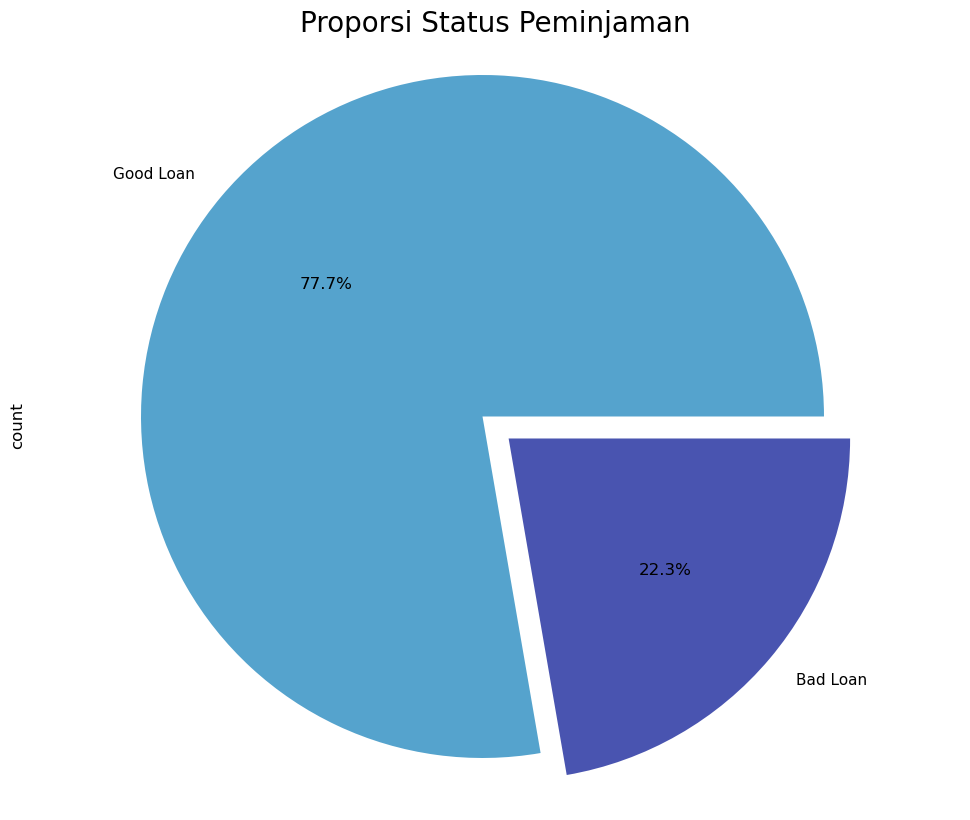

In [281]:
plt.figure(figsize=(12, 10))
plt.title("Proporsi Status Peminjaman", fontsize=20)
modify_df["loan_status"].value_counts().plot.pie(explode=[0.05, 0.05], labels=["Good Loan", "Bad Loan"], autopct='%1.1f%%')
plt.axis('equal')

percentage = status_percentage['count'].apply("{:.2f}%".format)

print("Presentase masing-masing value dari loan_status:")
print(percentage)

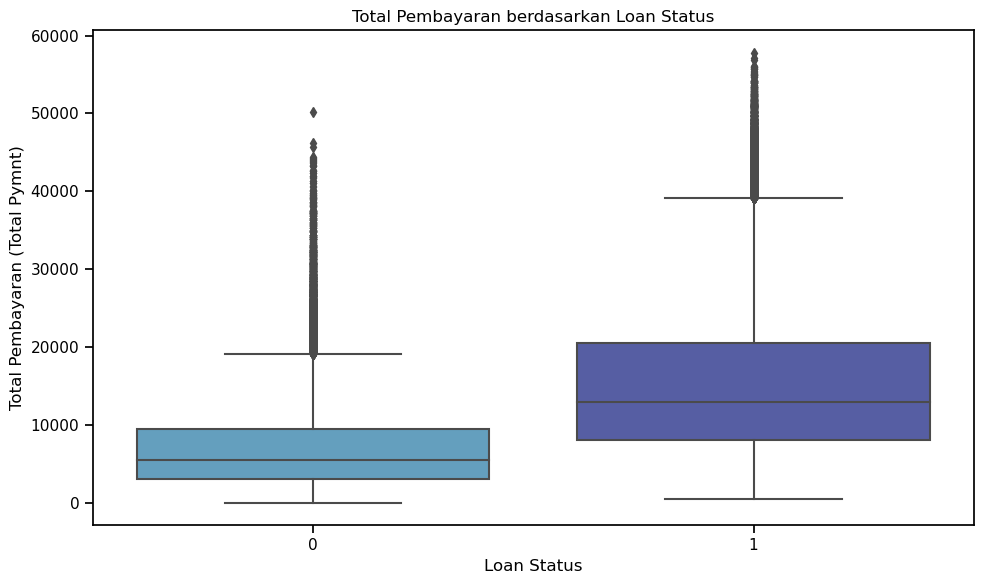

In [282]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=modify_df, x='loan_status', y='total_pymnt')

plt.xlabel('Loan Status')
plt.ylabel('Total Pembayaran (Total Pymnt)')
plt.title('Total Pembayaran berdasarkan Loan Status')
plt.tight_layout()
plt.show()

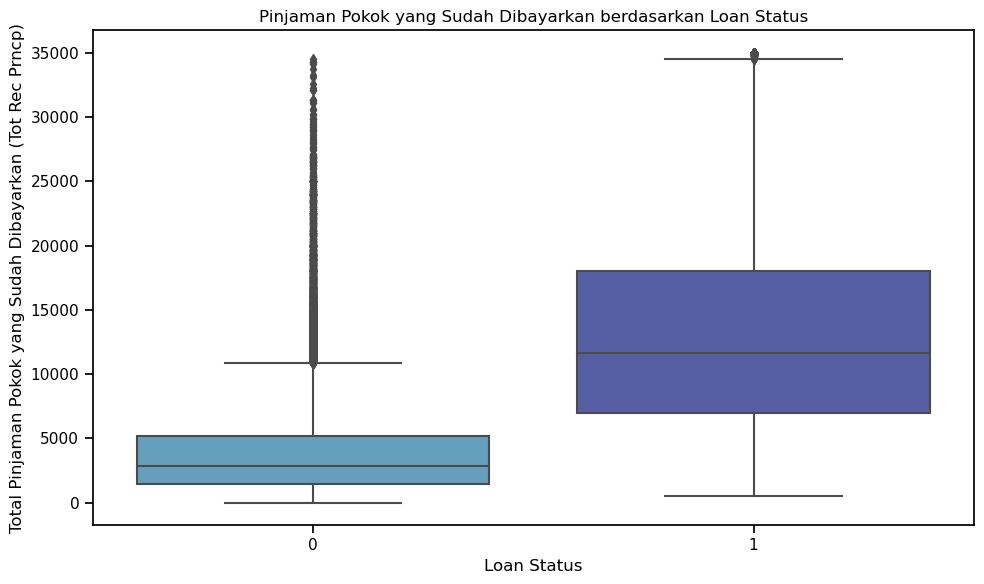

In [283]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_rec_prncp', data=modify_df)

plt.xlabel('Loan Status')
plt.ylabel('Total Pinjaman Pokok yang Sudah Dibayarkan (Tot Rec Prncp)')
plt.title('Pinjaman Pokok yang Sudah Dibayarkan berdasarkan Loan Status')
plt.tight_layout()
plt.show()

## Analysis of Average Loans

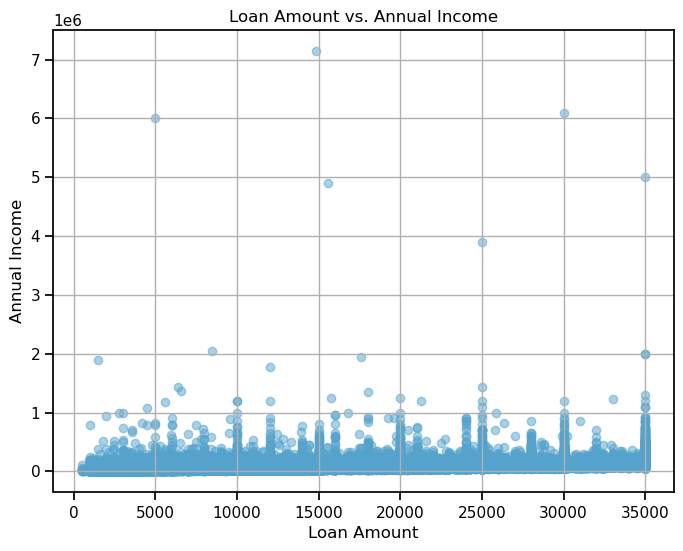

Rata-rata Annual Income untuk Loan Amount 0 - 17500: 62,011.87
Annual Income Tertinggi untuk Loan Amount 0 - 17500: 7,141,778.00
Rata-rata Annual Income untuk Loan Amount 17500 - 35000: 97,917.68
Annual Income Tertinggi untuk Loan Amount 17500 - 35000: 6,100,000.00


In [284]:
plt.figure(figsize=(8, 6))
plt.scatter(modify_df['loan_amnt'], modify_df['annual_inc'], alpha=0.5)
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')
plt.grid(True)
plt.show()

loan_amount_range_1 = modify_df[(modify_df['loan_amnt'] >= 0) & (modify_df['loan_amnt'] <= 17500)]
mean_income_range_1 = loan_amount_range_1['annual_inc'].mean()
max_income_range_1 = loan_amount_range_1['annual_inc'].max()

loan_amount_range_2 = modify_df[(modify_df['loan_amnt'] > 17500) & (modify_df['loan_amnt'] <= 35000)]
mean_income_range_2 = loan_amount_range_2['annual_inc'].mean()
max_income_range_2 = loan_amount_range_2['annual_inc'].max()

print("Rata-rata Annual Income untuk Loan Amount 0 - 17500: {:,.2f}".format(mean_income_range_1))
print("Annual Income Tertinggi untuk Loan Amount 0 - 17500: {:,.2f}".format(max_income_range_1))

print("Rata-rata Annual Income untuk Loan Amount 17500 - 35000: {:,.2f}".format(mean_income_range_2))
print("Annual Income Tertinggi untuk Loan Amount 17500 - 35000: {:,.2f}".format(max_income_range_2))

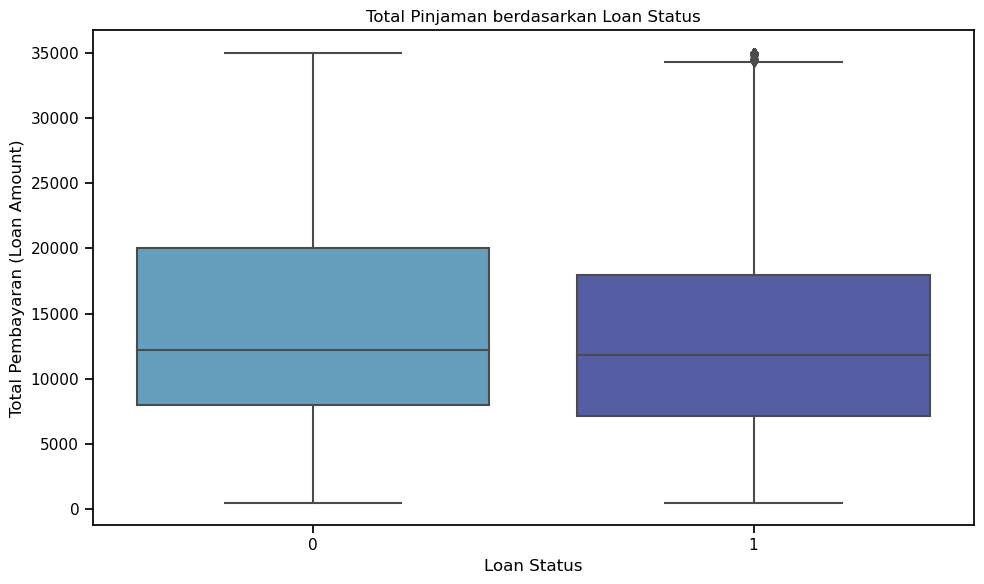

In [285]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=modify_df, x='loan_status', y='loan_amnt')

plt.xlabel('Loan Status')
plt.ylabel('Total Pembayaran (Loan Amount)')
plt.title('Total Pinjaman berdasarkan Loan Status')
plt.tight_layout()
plt.show()

## Interest Rate Analysis (Interest Rate)

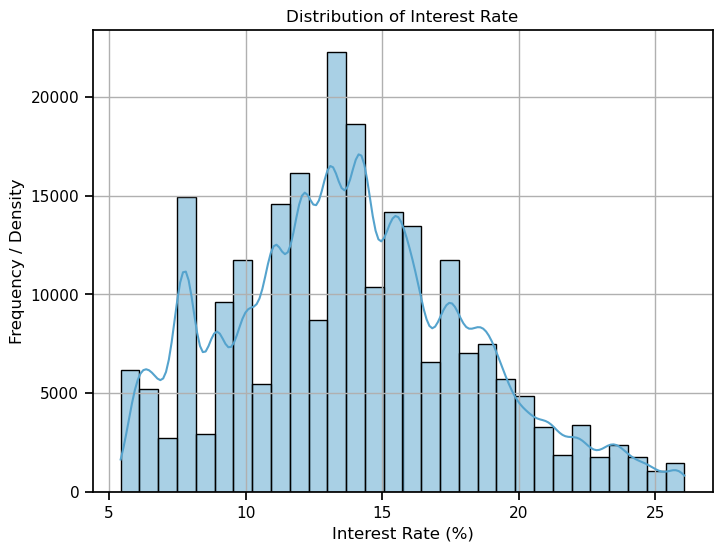

Tingkat Bunga Maksimum: 26.06%
Tingkat Bunga Minimum: 5.42%
Tingkat Bunga Rata-rata: 13.84%


In [286]:
plt.figure(figsize=(8, 6))
sns.histplot(modify_df['int_rate'], bins=30, kde=True, edgecolor='black')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Interest Rate')
plt.grid(True)
plt.show()

max_int_rate = modify_df['int_rate'].max()
min_int_rate = modify_df['int_rate'].min()
mean_int_rate = modify_df['int_rate'].mean()

print("Tingkat Bunga Maksimum: {:.2f}%".format(max_int_rate))
print("Tingkat Bunga Minimum: {:.2f}%".format(min_int_rate))
print("Tingkat Bunga Rata-rata: {:.2f}%".format(mean_int_rate))

The distribution of interest rates (int_rate) on loan data has quite a wide variation, with interest rates ranging from 5.42% to 26.06%. The average interest rate overall is about 13.83%.

Translate :

Distribusi tingkat bunga (int_rate) pada data pinjaman memiliki variasi yang cukup luas, dengan tingkat bunga berkisar antara 5.42% hingga 26.06%. Rata-rata tingkat bunga secara keseluruhan adalah sekitar 13.84%.

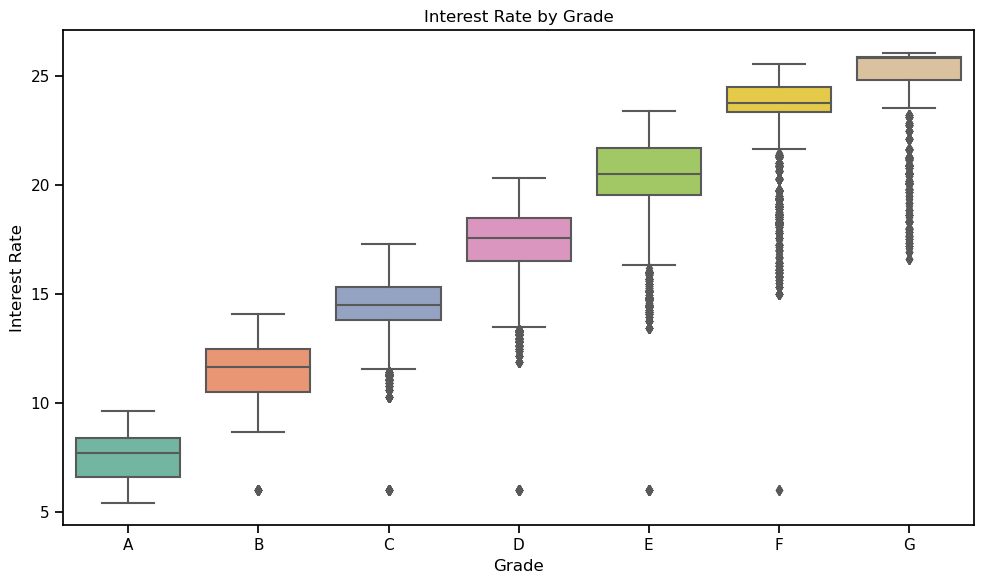

In [287]:
plt.figure(figsize=(10, 6))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.boxplot(x='grade', y='int_rate', data=df, order=grade_order, palette='Set2')

plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Grade')
plt.tight_layout()
plt.show()

## Loan Purpose Analysis

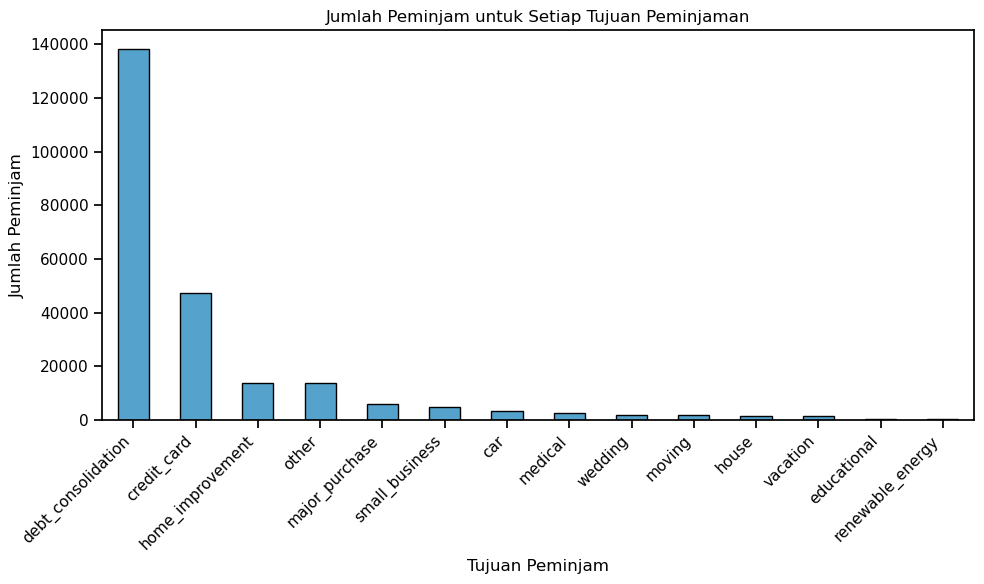

Jumlah Pinjaman untuk Setiap Tujuan:
purpose
debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: count, dtype: int64

Tujuan Peminjaman yang Paling Umum:  debt_consolidation
Jumlah Peminjaman untuk Tujuan Tersebut:  138318


In [288]:
loan_counts_by_purpose = modify_df['purpose'].value_counts()

plt.figure(figsize=(10, 6))
loan_counts_by_purpose.plot(kind='bar', edgecolor='black')
plt.xlabel('Tujuan Peminjam')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Peminjam untuk Setiap Tujuan Peminjaman')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Jumlah Pinjaman untuk Setiap Tujuan:")
print(loan_counts_by_purpose)

most_common_purpose = loan_counts_by_purpose.idxmax()
most_common_count = loan_counts_by_purpose.max()

print("\nTujuan Peminjaman yang Paling Umum: ", most_common_purpose)
print("Jumlah Peminjaman untuk Tujuan Tersebut: ", most_common_count)

## Credit Quality Analysis

<Figure size 1000x600 with 0 Axes>

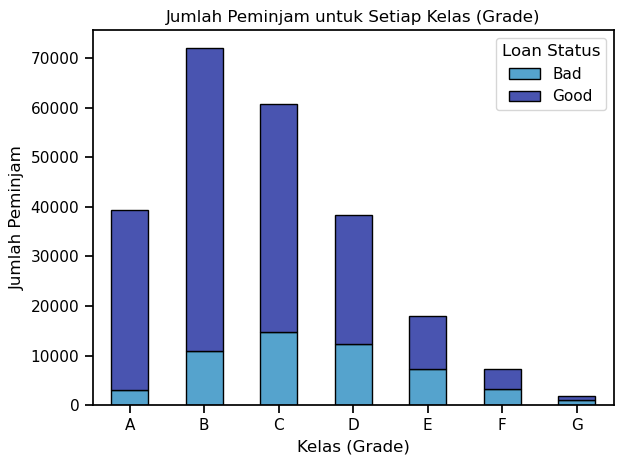

loan_status,0,1
grade,,
A,2987,36455
B,11028,60962
C,14865,45818
D,12342,26089
E,7342,10569
F,3346,3927
G,1046,919


In [289]:
loan_counts_by_grade_status = modify_df.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)
loan_counts_by_sub_grade_status = modify_df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
loan_counts_by_grade_status.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Kelas (Grade)')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Peminjam untuk Setiap Kelas (Grade)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper right', labels=['Bad','Good'])
plt.tight_layout()
plt.show()
loan_counts_by_grade_status

<Figure size 1000x600 with 0 Axes>

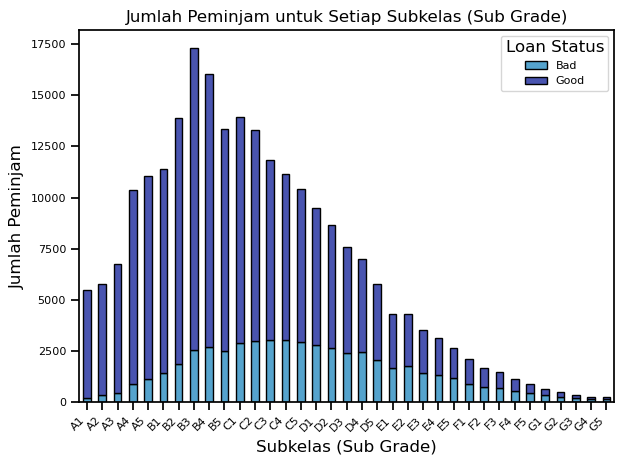

loan_status,0,1
sub_grade,,
A1,205,5289
A2,322,5436
A3,453,6293
A4,863,9507
A5,1144,9930
B1,1403,9972
B2,1865,12009
B3,2563,14753
B4,2707,13350


In [290]:
plt.figure(figsize=(10, 6))  # Increase the figure size
loan_counts_by_sub_grade_status.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subkelas (Sub Grade)')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Peminjam untuk Setiap Subkelas (Sub Grade)')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust the font size for x-axis labels
plt.yticks(fontsize=8)  # Adjust the font size for y-axis labels
plt.legend(title='Loan Status', loc='upper right', labels=['Bad', 'Good'], fontsize=8)  # Adjust the font size for legend
plt.tight_layout()
plt.show()
loan_counts_by_sub_grade_status

## Long Working Analysis

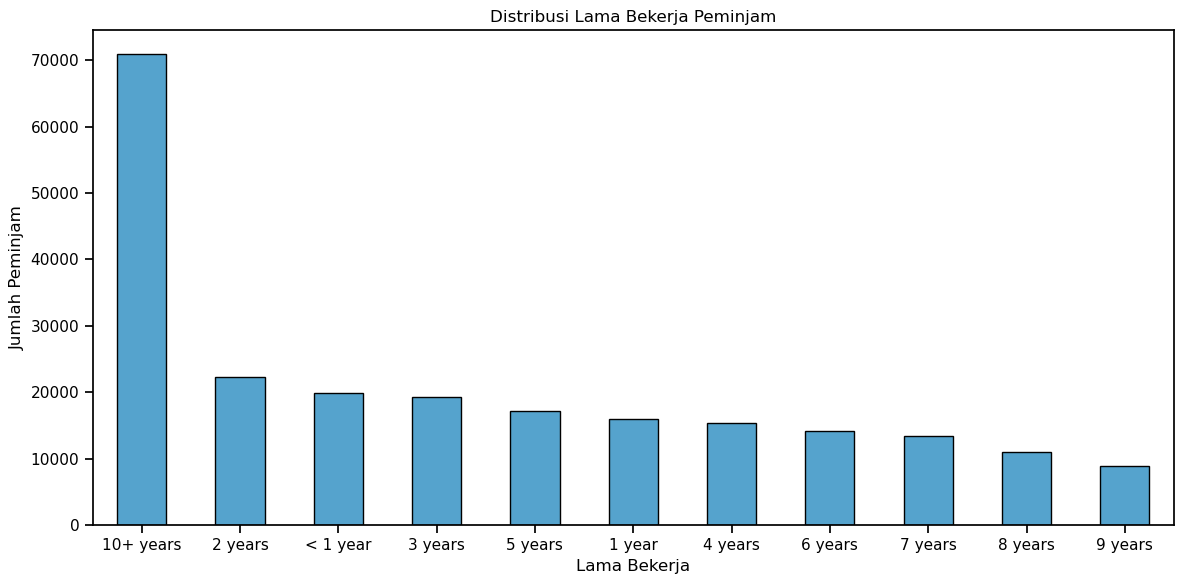

emp_length
10+ years    70939
2 years      22246
< 1 year     19886
3 years      19295
5 years      17224
1 year       16006
4 years      15322
6 years      14242
7 years      13402
8 years      11042
9 years       8935
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

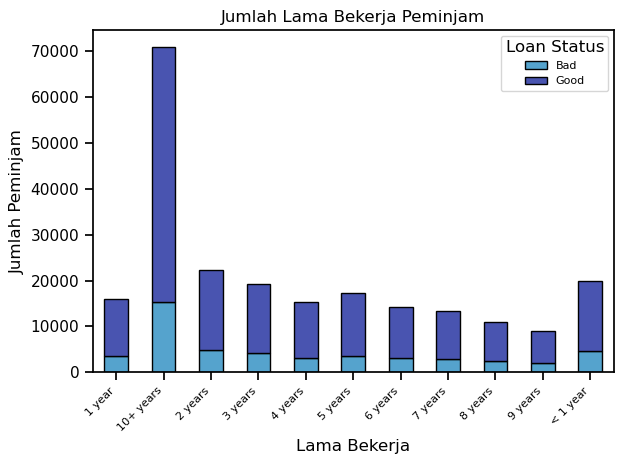

loan_status,0,1
emp_length,,
1 year,3571,12435
10+ years,15266,55673
2 years,4807,17439
3 years,4202,15093
4 years,3220,12102
5 years,3660,13564
6 years,3159,11083
7 years,2983,10419
8 years,2540,8502


In [291]:
plt.figure(figsize=(12, 6))
modify_df['emp_length'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Lama Bekerja')
plt.ylabel('Jumlah Peminjam')
plt.title('Distribusi Lama Bekerja Peminjam')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(modify_df['emp_length'].value_counts())

loan_counts_by_emp_length = modify_df.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
loan_counts_by_emp_length.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Lama Bekerja')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Lama Bekerja Peminjam')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Loan Status', loc='upper right', labels=['Bad', 'Good'], fontsize=8)
plt.tight_layout()
plt.show()
loan_counts_by_emp_length

## Home Ownership Analysis

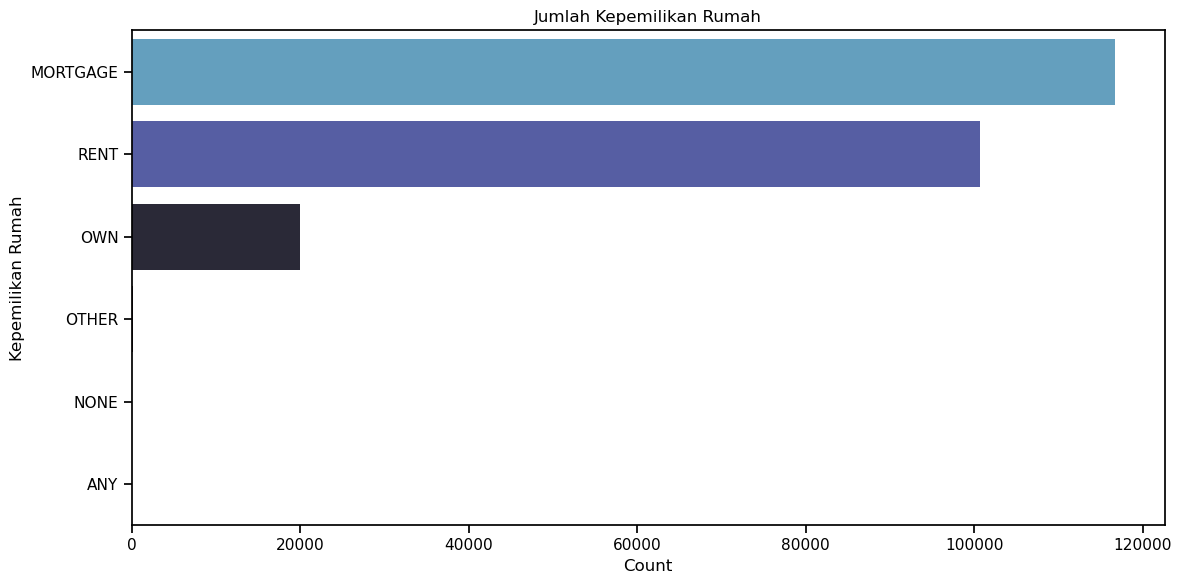

In [292]:
home_ownership_counts = modify_df['home_ownership'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=modify_df, y='home_ownership', order=home_ownership_counts.index)

plt.xlabel('Count')
plt.ylabel('Kepemilikan Rumah')
plt.title('Jumlah Kepemilikan Rumah')
plt.tight_layout()
plt.show()

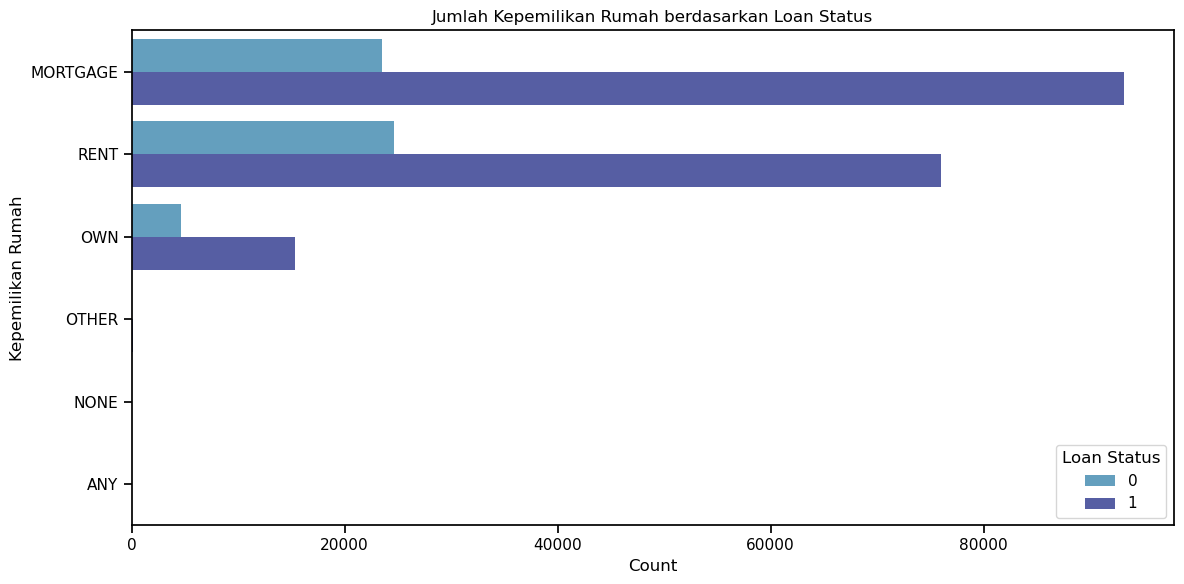

In [293]:
plt.figure(figsize=(12, 6))
sns.countplot(data=modify_df, y='home_ownership', order=home_ownership_counts.index, hue='loan_status')

plt.xlabel('Count')
plt.ylabel('Kepemilikan Rumah')
plt.title('Jumlah Kepemilikan Rumah berdasarkan Loan Status')
plt.legend(title='Loan Status', loc='lower right')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Inputation

In [294]:
# def analyze_and_visualize_column(df, column_name):
#     """
#     Fungsi untuk melakukan analisis distribusi dan visualisasi pada suatu kolom data.

#     Parameters:
#     df (DataFrame): DataFrame yang berisi data.
#     column_name (str): Nama kolom yang akan dianalisis.

#     Returns:
#     None
#     """
#     # Menghitung skewness dan kurtosis pada kolom data
#     a = df[column_name].skew()
#     b = df[column_name].kurtosis()

#     print("\nSkewness '", column_name, "':", a)
#     print("Kurtosis '", column_name, "':", b)

#     # Visualisasi box plot untuk mendeteksi pencilan
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=df[column_name])
#     plt.xlabel(column_name)
#     plt.title('Box Plot Kolom ' + column_name)
#     plt.show()

#     # Visualisasi histogram untuk mengecek distribusi data
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df[column_name], kde=True)
#     plt.xlabel(column_name)
#     plt.title('Histogram Kolom ' + column_name)
#     plt.show()

# analyze_and_visualize_column(modify_df, 'variabel')

In [295]:
def fill_null_with_mean_or_median(df, feature, method='mean'):
    """
    Fungsi untuk mengisi nilai null pada kolom tertentu dengan menggunakan mean atau median.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom (fitur) yang akan diisi nilai null.
    method (str, optional): Metode yang akan digunakan, 'mean' (default) atau 'median'.

    Returns:
    DataFrame: DataFrame yang telah diisi nilai null pada kolom yang ditentukan.
    """
    if method not in ['mean', 'median']:
        raise ValueError("Metode harus 'mean' atau 'median'.")

    if method == 'mean':
        fill_value = df[feature].mean()
    else:
        fill_value = df[feature].median()

    df[feature].fillna(fill_value, inplace=True)
    return df

In [296]:
df_filled = fill_null_with_mean_or_median(modify_df, 'total_rev_hi_lim', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'tot_cur_bal', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'tot_coll_amt', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'revol_util', method='mean')
df_filled = fill_null_with_mean_or_median(modify_df, 'collections_12_mths_ex_med', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'open_acc', method='mean')
df_filled = fill_null_with_mean_or_median(modify_df, 'pub_rec', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'total_acc', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'inq_last_6mths', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'delinq_2yrs', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'acc_now_delinq', method='median')
df_filled = fill_null_with_mean_or_median(modify_df, 'annual_inc', method='median')

In [297]:
def fill_null_with_mode(df, column_name):
    """
    Fungsi untuk mengisi nilai null pada kolom tertentu dengan modus.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    column_name (str): Nama kolom yang akan diisi nilai null dengan modus.

    Returns:
    DataFrame: DataFrame yang telah diisi nilai null pada kolom yang ditentukan.
    """
    mode_value = df[column_name].mode().iloc[0]
    df[column_name].fillna(mode_value, inplace=True)
    return df

In [298]:
df_filled = fill_null_with_mode(modify_df, 'emp_title')
df_filled = fill_null_with_mode(modify_df, 'emp_length')
df_filled = fill_null_with_mode(modify_df, 'last_pymnt_d')
df_filled = fill_null_with_mode(modify_df, 'earliest_cr_line')
df_filled = fill_null_with_mode(modify_df, 'last_credit_pull_d')
df_filled = fill_null_with_mode(modify_df, 'title')

## Feature Selection

In [299]:
def filter_columns_by_condition(df, min_unique_obj, max_unique_obj, min_unique_num, max_unique_num, min_count_obj):
    '''
    Fungsi untuk menghapus beberapa feature yang tidak terpakai.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    min_unique_obj = Jumlah minimal nilai unique yang dimiliki oleh feature (Object)
    max_unique_obj = Jumlah maximal nilai unique yang dimiliki oleh feature (Object)
    min_unique_num = Jumlah minimal nilai unique yang dimiliki oleh feature (Number)
    max_unique_num = Jumlah maximal nilai unique yang dimiliki oleh feature (Number)
    min_count_obj = Jumlah unique yang dimiliki feature

    Returns:
    DataFrame: DataFrame yang telah menghapus feature berdasarkan parameter.
    '''
    unique_obj = df.select_dtypes(include=['object']).nunique()
    unique_num = df.select_dtypes(include=['number']).nunique()

    single_obj_colname = unique_obj[unique_obj == min_unique_obj].index.tolist()
    single_num_colname = unique_num[unique_num == min_unique_num].index.tolist()

    unique_obj_colname = unique_obj[(unique_obj >= df.shape[0]) if max_unique_obj is None else (unique_obj == max_unique_obj)].index.tolist()
    unique_num_colname = unique_num[(unique_num >= df.shape[0]) if max_unique_num is None else (unique_num == max_unique_num)].index.tolist()

    multiple_obj_colname = unique_obj[unique_obj > min_count_obj].index.tolist()

    remove = single_obj_colname + single_num_colname + unique_obj_colname + unique_num_colname + multiple_obj_colname

    df_new = df.loc[:, ~df.columns.isin(remove)].copy()

    return df_new

df_new = filter_columns_by_condition(modify_df, min_unique_obj=1, max_unique_obj=None, min_unique_num=1, max_unique_num=None, min_count_obj=500)

In [300]:
correlation = (df_new.select_dtypes(exclude=object).corr())
correlation['loan_status'].sort_values(ascending=False)

loan_status                   1.000000
total_rec_prncp               0.469205
last_pymnt_amnt               0.403200
total_pymnt_inv               0.362003
total_pymnt                   0.359668
annual_inc                    0.060387
tot_cur_bal                   0.056807
total_rev_hi_lim              0.041816
total_acc                     0.025865
tot_coll_amt                  0.001119
collections_12_mths_ex_med   -0.008770
acc_now_delinq               -0.009197
revol_bal                    -0.010722
pub_rec                      -0.013565
open_acc                     -0.023087
delinq_2yrs                  -0.028162
installment                  -0.042451
funded_amnt_inv              -0.052586
funded_amnt                  -0.060127
loan_amnt                    -0.060230
total_rec_int                -0.063272
revol_util                   -0.093923
inq_last_6mths               -0.107463
dti                          -0.119055
total_rec_late_fee           -0.165734
int_rate                 

In [301]:
have_cor = correlation[(correlation >= 0.5) & (correlation <= 0.9)]
have_cor

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830804,0.826653,0.758835,0.683451,NaN,NaN,NaN,0.542132,NaN,NaN,NaN,NaN,NaN
funded_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832375,0.828757,0.760778,0.682814,NaN,NaN,NaN,0.544878,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826480,0.835570,0.755728,0.677064,NaN,NaN,NaN,0.547571,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813755,0.809636,0.753844,0.635278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
numerical_feature = have_cor.columns[have_cor.notnull().any()].tolist()
numerical_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'open_acc',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [303]:
categorical_feature = ["grade", "emp_length", "home_ownership", "verification_status", "purpose"]
categorical_feature

['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

# Modelling

In [304]:
X = df_new.drop(columns="loan_status")
y = df_new.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190156, 42), (47539, 42), (190156,), (47539,))

In [307]:
# Data preprocessing pipelines
numerical_pipeline = Pipeline([
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numerical_feature),
    ("categoric", categorical_pipeline, categorical_feature)
])

pipeline = pipeline([
    ("prep", preprocessor),
    ("smote", SMOTE()),
    ("algo", LogisticRegression())
])

In [308]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'total_rec_int',
                                                   'recoveries',
                                                   'collection_recovery_fee',
                                                   'last_pymnt_amnt',
                                                   'total_rev_hi_lim']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['grade', 'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'purpose'])])),
                ('smote', SMOTE()), ('algo', LogisticRegression())])

## Model Evaluation

### Train Data

In [309]:
pipeline.score(X_train, y_train)

0.9859694145859189

In [310]:
report_train = classification_report(y_true=y_train, y_pred=pipeline.predict(X_train))
print(report_train)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     42365
           1       0.99      1.00      0.99    147791

    accuracy                           0.99    190156
   macro avg       0.99      0.97      0.98    190156
weighted avg       0.99      0.99      0.99    190156



### Test Data

In [311]:
pipeline.score(X_test, y_test)

0.9861376974694461

In [312]:
y_pred_proba = pipeline.predict_proba(X_test)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])


print("Accuracy ",accuracy)
print("Recall ",recall)
print("Precision ",precision)
print("AUC ",AUC)

Accuracy  0.9861376974694461
Recall  0.9951012233409116
Precision  0.9871660625587327
AUC  0.9937956604451722


In [313]:
report = classification_report(y_true = y_train, y_pred = pipeline.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     42365
           1       0.99      1.00      0.99    147791

    accuracy                           0.99    190156
   macro avg       0.99      0.97      0.98    190156
weighted avg       0.99      0.99      0.99    190156



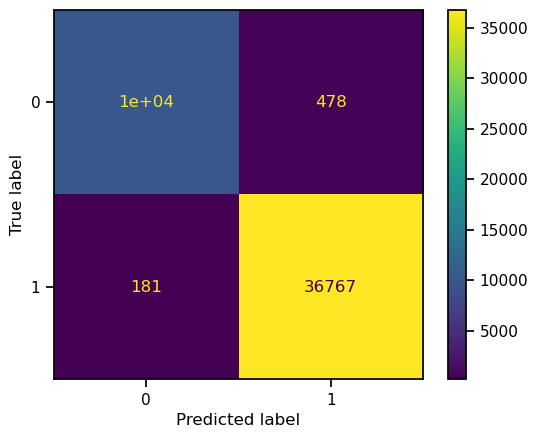

In [314]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()